In [7]:
from typing import TypedDict, Dict
from langgraph.graph import StateGraph, START, END

In [8]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNum: int

In [ ]:
def adder(state: AgentState) -> AgentState:
    state['finalNum'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    state['finalNum'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> AgentState:
    if state['operation'] == '+':
        return "Add_operation"
    elif state['operation'] == 'subtract':
        return "Subtract_operation"

In [20]:
graph = StateGraph(AgentState)
graph.add_node('add_node',adder)
graph.add_node('subtract_node',subtractor)
graph.add_node('router',lambda state:state)
graph.add_edge(START, 'router')
graph.add_conditional_edges(
    'router', decide_next_node,
    {
        'Add_operation': 'add_node',
        'Subtract_operation': 'subtract_node'
    }
)

graph.add_edge('add_node', END)
graph.add_edge('subtract_node', END)

app = graph.compile()


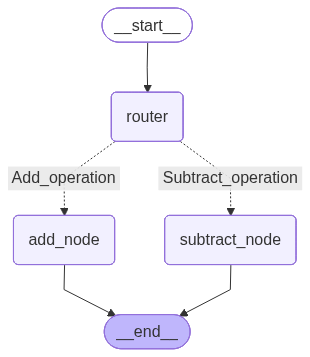

In [22]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
initial_state_1 = AgentState(number1 = 10, number2 = 5, operation = "-")
print(app.invoke(initial_state_1))

TypeError: unhashable type: 'dict'